## Project Title:
### "Enhancing Insights from New York City Airbnb Data: A Comprehensive Data Cleaning and Analysis"

### Project Overview:
The project aims to leverage the New York City Airbnb dataset to enhance data quality through cleaning procedures and extract valuable insights through exploratory data analysis (EDA). By addressing data inconsistencies, handling missing values, and exploring patterns in the dataset, the project seeks to provide a robust foundation for subsequent analyses and decision-making.

#### **Data: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata **

### Background:
Airbnb has transformed the hospitality industry, providing a unique platform for travelers and hosts to engage in personalized lodging experiences. The New York City Airbnb dataset, as part of Airbnb Inside, captures listing activities, reviews, and calendar details. The dataset offers an opportunity to gain valuable insights into host behaviors, areas of popularity, and pricing dynamics.

### Problem Statement:
The dataset exhibits inconsistencies, missing values, and potential data quality issues that need to be addressed. Cleaning and preparing the data are crucial steps to ensure accurate analyses and reliable insights. Additionally, there is a need to uncover patterns and trends within the dataset that can provide actionable information for hosts and the Airbnb platform.

### Objectives:
1. **Data Cleaning:**
   - Identify and rectify inconsistencies, missing values, and outliers in the dataset.
   - Create new variables or columns to enhance the richness of the dataset.

2. **Exploratory Data Analysis (EDA):**
   - Explore the relationship between room types and pricing.
   - Identify key factors influencing pricing decisions.
   - Analyze variations in user traffic among different geographical areas.

4. **Visualization:**
   - Utilize data visualization techniques to present key findings in an accessible and insightful manner.


This project aims to provide a cleaner, more coherent dataset and deliver valuable insights that can inform strategic decisions for both hosts and the Airbnb platform.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set

airbnb_df = pd.read_csv("./Data/Airbnb_Open_Data.csv",low_memory=False)
airbnb_df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# Description

airbnb_df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
# Column Headers

airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
# Cheaning Column Headers

airbnb_df.columns = [x.lower().replace(' ','_') for x in airbnb_df.columns]
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [7]:
# Shape
airbnb_df.shape

(102599, 26)

In [8]:
# droping duplicates

airbnb_df.drop_duplicates(inplace=True)
airbnb_df.shape

(102058, 26)

In [9]:
# Dropped about more than 500 duplicate rows

In [10]:
airbnb_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   name                            101808 non-null  object 
 2   host_id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host_name                       101654 non-null  object 
 5   neighbourhood_group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country_code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

In [11]:
# To check for count of missing values

airbnb_df.isnull().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            404
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [12]:
airbnb_df.nunique()

id                                102058
name                               61281
host_id                           102057
host_identity_verified                 2
host_name                          13190
neighbourhood_group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country_code                           1
instant_bookable                       2
cancellation_policy                    3
room_type                              4
construction_year                     20
price                               1151
service_fee                          231
minimum_nights                       153
number_of_reviews                    476
last_review                         2477
reviews_per_month                   1016
review_rate_number                     5
calculated_host_listings_count        78
availability_365                     438
house_rules     

## Data Cleaning

#### Based on observation,
##### Columns to be droped:

'name', 
'host_name', 
'lat', 
'long', 
'country', 
'country_code', 
'instant_bookable', 
'house_rules', 
'license'

##### Columns to Calculate the values:

'host_identity_verified' (289 null values), 
'neighbourhood_group' (29 null values), 
'neighbourhood' (16 null values), 
'cancellation_policy' (76 null values), 
'construction_year' (214 null values), 
'price' (247 null values), 
'service_fee' (273 null values), 
'minimum_nights' (400 null values), 
'number_of_reviews' (183 null values), 
'last_review' (15832 null values), 
'reviews_per_month' (15818 null values), 
'review_rate_number' (319 null values), 
'calculated_host_listings_count' (319 null values), 
'availability_365' (448 null values)

In [13]:
# To Drop the unnecessary columns

airbnb_df.drop([col for col in ['name', 'host_name', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'house_rules', 'license'] if col in airbnb_df.columns], axis=1, inplace=True)
airbnb_df.shape

(102058, 17)

In [14]:
# Calculate the missing values

for i in airbnb_df.columns:
    if i == 'host_identity_verified':
        airbnb_df.loc[airbnb_df[i].isnull(), 'host_identity_verified'] = airbnb_df[i].mode()[0] # Mode
    
    if i == 'neighbourhood':
        airbnb_df.loc[airbnb_df[i].isnull(), 'neighbourhood'] = airbnb_df[i].mode()[0] # Mode
    
    if i == 'cancellation_policy':
        airbnb_df.loc[airbnb_df[i].isnull(), 'cancellation_policy'] = airbnb_df[i].mode()[0] # Mode
        
    if i == 'price':
        airbnb_df.loc[airbnb_df[i].isnull(), 'price'] = airbnb_df[i].mode()[0] # Mode
    
    if i == 'service_fee':
        airbnb_df.loc[airbnb_df[i].isnull(), 'service_fee'] = airbnb_df[i].mode()[0] # Mode
    
    if i == 'construction_year':
        airbnb_df.loc[airbnb_df[i].isnull(), 'construction_year'] = airbnb_df[i].mode()[0] # Mode
        
    if i == 'last_review':
        airbnb_df.loc[airbnb_df[i].isnull(), 'last_review'] = airbnb_df[i].mode()[0] # Mode
    
    if i == 'reviews_per_month':
        airbnb_df.loc[airbnb_df[i].isnull(), 'reviews_per_month'] = airbnb_df[i].mode()[0] # Mode    
    
    if i == 'availability_365':
        airbnb_df.loc[airbnb_df[i].isnull(), 'availability_365'] = airbnb_df[i].mode()[0] # Mode
    
    
    
    if i == 'minimum_nights':
        airbnb_df.loc[airbnb_df[i].isnull(), 'minimum_nights'] = airbnb_df[i].median() # Median

    if i == 'number_of_reviews':
        airbnb_df.loc[airbnb_df[i].isnull(), 'number_of_reviews'] = airbnb_df[i].median() # Median
        
    if i == 'review_rate_number':
        airbnb_df.loc[airbnb_df[i].isnull(), 'review_rate_number'] = airbnb_df[i].median() # Median
    
    if i == 'calculated_host_listings_count':
        airbnb_df.loc[airbnb_df[i].isnull(), 'calculated_host_listings_count'] = airbnb_df[i].median() # Median

In [15]:
airbnb_df.isnull().sum()

id                                 0
host_id                            0
host_identity_verified             0
neighbourhood_group               29
neighbourhood                      0
cancellation_policy                0
room_type                          0
construction_year                  0
price                              0
service_fee                        0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
review_rate_number                 0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [16]:
airbnb_df.nunique()

id                                102058
host_id                           102057
host_identity_verified                 2
neighbourhood_group                    7
neighbourhood                        224
cancellation_policy                    3
room_type                              4
construction_year                     20
price                               1151
service_fee                          231
minimum_nights                       153
number_of_reviews                    476
last_review                         2477
reviews_per_month                   1016
review_rate_number                     5
calculated_host_listings_count        78
availability_365                     438
dtype: int64

In [17]:
neighbourhood_grp = airbnb_df.loc[(airbnb_df['neighbourhood_group'].isnull()),'neighbourhood']
neighbourhood_grp

for i in neighbourhood_grp:
    mode = airbnb_df.loc[(airbnb_df['neighbourhood'] == i) & (airbnb_df['neighbourhood_group'].notnull()),'neighbourhood_group'].mode()[0]
    airbnb_df.loc[(airbnb_df['neighbourhood_group'].isnull()) & (airbnb_df['neighbourhood'] == i), 'neighbourhood_group'] = mode


In [18]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        43570
Brooklyn         41643
Queens           13199
Bronx             2695
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood_group, dtype: int64

In [19]:
airbnb_df.replace({'brookln':'Brooklyn','manhatan':'Manhattan'}, inplace=True)
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: neighbourhood_group, dtype: int64

In [20]:
airbnb_df.isnull().sum()

id                                0
host_id                           0
host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
for i in airbnb_df.columns:
    print(i, '\n',airbnb_df[i].value_counts(),'*'*40, '\n')

id 
 1001254     1
38582590    1
38581485    1
38580933    1
38580380    1
           ..
19789477    1
19788925    1
19788373    1
19787821    1
57367417    1
Name: id, Length: 102058, dtype: int64 **************************************** 

host_id 
 29531702698    2
50581630001    1
68762673377    1
73658732887    1
19885857361    1
              ..
11073573721    1
62212747215    1
9019472962     1
18027185846    1
93578954226    1
Name: host_id, Length: 102057, dtype: int64 **************************************** 

host_identity_verified 
 unconfirmed    51233
verified       50825
Name: host_identity_verified, dtype: int64 **************************************** 

neighbourhood_group 
 Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: neighbourhood_group, dtype: int64 **************************************** 

neighbourhood 
 Bedford-Stuyvesant        7914
Williamsburg              7732
Harlem                  

In [22]:
# https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/code
# https://www.kaggle.com/code/ajii007/airbnb-eda/notebook
# https://www.youtube.com/watch?v=Ky1Jo8th24w
# https://github.com/samujjalp/airbnb-booking-analysis/blob/main/Airbnb_EDA_Project.ipynb

In [23]:
# Converting float to int

airbnb_df['construction_year'] = airbnb_df['construction_year'].astype(int)
airbnb_df['construction_year']

0         2020
1         2007
2         2005
3         2005
4         2009
          ... 
102053    2014
102054    2014
102055    2014
102056    2014
102057    2011
Name: construction_year, Length: 102058, dtype: int32

In [24]:
# Removing the specical characters and Converting to float. 

airbnb_df['price'] = airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df['price']

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102053     696.0
102054     909.0
102055     387.0
102056     848.0
102057    1128.0
Name: price, Length: 102058, dtype: float64

In [25]:
# Removing the specical characters and Converting to float. 

airbnb_df['service_fee'] = airbnb_df['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df['service_fee']

0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102053    216.0
102054    216.0
102055    216.0
102056    216.0
102057    216.0
Name: service_fee, Length: 102058, dtype: float64

In [26]:
# To remove all the -ve values.

airbnb_df['minimum_nights'] = airbnb_df['minimum_nights'].astype(int)
airbnb_df['minimum_nights'].unique()

array([   10,    30,     3,    45,     2,     1,     5,     4,    90,
           7,    14,    60,   180,     9,    31,     6,    15,    29,
           8,    47,    81,   144,   371,   149,   273,   131,   275,
         323,    59,    99,   268,   -10,   189,   340,   128,   350,
         166,   110,    57,   142,   366,    28,   200,    50,   399,
          17,    11,   452,    25,    13,  3455,    -5,    21,    27,
          18,   365,    -1,    20,   -12,    40,    44,   398,    -2,
          65,    -3,    55,   120,   122,    19,   240,    88,   115,
         150,   370,    16,    80,   181,    26,   265,   300,   185,
         360,    56,    12,    70,    39,    24,    32,  1000,   270,
          22,    75,   250,    62,    23,  1250,   364,    74,   198,
         100,   500,    43,    35,    91,   480,    53,   160,   999,
         186,    68,    93,    87,   183,   299,   175,    98,   133,
         354,    42,    33,    37,   225,   400,   105,   184,   153,
         134,   222,

In [27]:
for i in airbnb_df['minimum_nights'].value_counts().index:
    if i < 0:
        airbnb_df['minimum_nights'] = airbnb_df['minimum_nights'].replace(i,-i)
airbnb_df['minimum_nights'].unique()

array([  10,   30,    3,   45,    2,    1,    5,    4,   90,    7,   14,
         60,  180,    9,   31,    6,   15,   29,    8,   47,   81,  144,
        371,  149,  273,  131,  275,  323,   59,   99,  268,  189,  340,
        128,  350,  166,  110,   57,  142,  366,   28,  200,   50,  399,
         17,   11,  452,   25,   13, 3455,   21,   27,   18,  365,   20,
         12,   40,   44,  398,   65,   55,  120,  122,   19,  240,   88,
        115,  150,  370,   16,   80,  181,   26,  265,  300,  185,  360,
         56,   70,   39,   24,   32, 1000,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   35,   91,  480,
         53,  160,  999,  186,   68,   93,   87,  183,  299,  175,   98,
        133,  354,   42,   33,   37,  225,  400,  105,  184,  153,  134,
        222,   58,  210,  182,  954, 5645, 2645, 1223,  114,   85,   36,
         48,  155,  307,  129,  145,   64,  333,  119,  125,   34,  458,
        825])

In [28]:
airbnb_df['number_of_reviews'] = airbnb_df['number_of_reviews'].astype(int)
airbnb_df['number_of_reviews'].unique()

array([   9,   45,    0,  270,   74,   49,  430,  118,  160,   53,  188,
        167,  113,   27,  148,  198,  260,  130,   39,   71,   88,   19,
         58,  108,   29,  242,  197,  273,  168,  231,  214,  245,   15,
         25,   81,   97,   11,  248,   61,  135,  112,   73,   82,  328,
        105,  289,  138,   21,   42,    5,   66,  143,  191,    4,  338,
        106,  190,   23,  142,   54,   70,   16,   94,  194,    2,  174,
         24,  166,    7,    1,   30,  139,  233,   68,   46,  335,  162,
        170,  334,   12,  467,   38,  324,  115,  354,  195,   13,   36,
         63,  155,  193,   32,   50,   26,  426,  227,   84,   10,  124,
        240,  200,   79,   34,  134,  126,  234,  202,   28,  309,   14,
         80,  294,  150,   47,  219,  114,  213,   86,   18,  206,  122,
         33,   52,   51,  199,    3,   41,  109,  151,  285,  375,    6,
        358,  226,  104,  204,  253,  129,   37,   69,  192,   17,  222,
        205,  458,  183,  189,  127,   35,  171,   

Checking for Outliers

In [29]:
# Function to detect outliers using standard deviation
def detect_outliers_std(data, threshold=3):
    mean = data.mean()
    std = data.std()
    return abs(data - mean) > threshold * std

# Set the threshold for outliers
std_dev_threshold = 3

# Detect outliers for 'price' using standard deviation
outliers_price_std = detect_outliers_std(airbnb_df['price'], threshold=std_dev_threshold)


# Detect outliers for 'service_fee' using standard deviation
outliers_fee_std = detect_outliers_std(airbnb_df['service_fee'], threshold=std_dev_threshold)


# Print the rows with outliers for 'price'
print("Outliers in 'price':")
print(outliers_price_std.value_counts())

# Print the rows with outliers for 'service_fee'
print("\nOutliers in 'service_fee':")
print(outliers_fee_std.value_counts())

Outliers in 'price':
False    102058
Name: price, dtype: int64

Outliers in 'service_fee':
False    102058
Name: service_fee, dtype: int64


In [30]:
airbnb_df.describe()

,id,host_id,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.020580e+05,1.020580e+05,102058.000000,102058.000000,102058.000000,102058.00000,102058.000000,102058.000000,102058.000000,102058.000000,102058.000000
mean,2.918438e+07,4.926738e+10,2012.491260,624.340659,125.282565,8.14527,27.481158,1.166883,3.277862,7.915254,140.424856
std,1.627173e+07,2.853742e+10,5.760204,331.911273,66.403549,30.54802,49.534887,1.679003,1.283174,32.218215,135.452897
min,1.001254e+06,1.236005e+08,2003.000000,50.000000,10.000000,1.00000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,2008.000000,338.000000,68.000000,2.00000,1.000000,0.090000,2.000000,1.000000,2.000000
50%,2.918438e+07,4.912865e+10,2012.000000,623.000000,125.000000,3.00000,7.000000,0.480000,3.000000,1.000000,95.000000
75%,4.327590e+07,7.400619e+10,2017.000000,912.000000,183.000000,5.00000,30.000000,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,2022.000000,1200.000000,240.000000,5645.00000,1024.000000,90.000000,5.000000,332.000000,3677.000000


## Data Visualization

#### Host Identity Verification:

What is the distribution of hosts who have verified their identity?

Distribution of Host Identity Verification:
unconfirmed    51233
verified       50825
Name: host_identity_verified, dtype: int64


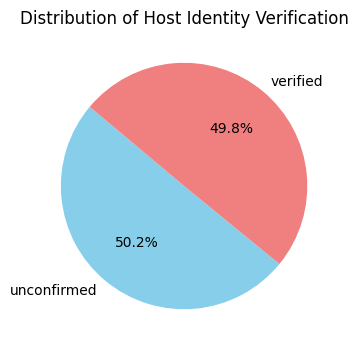

In [31]:
# Host Identity Verification

verification_distribution = airbnb_df['host_identity_verified'].value_counts()
print("Distribution of Host Identity Verification:")
print(verification_distribution)

plt.figure(figsize=(4,4))
plt.pie(verification_distribution, labels=verification_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Host Identity Verification') 
plt.show()

#### Neighborhood Characteristics:

How are listings distributed among different neighborhood groups?
Which neighborhood group has the highest average price?

Distribution of Listings by Neighborhood Group:
Manhattan        43571
Brooklyn         41644
Queens           13199
Bronx             2695
Staten Island      949
Name: neighbourhood_group, dtype: int64


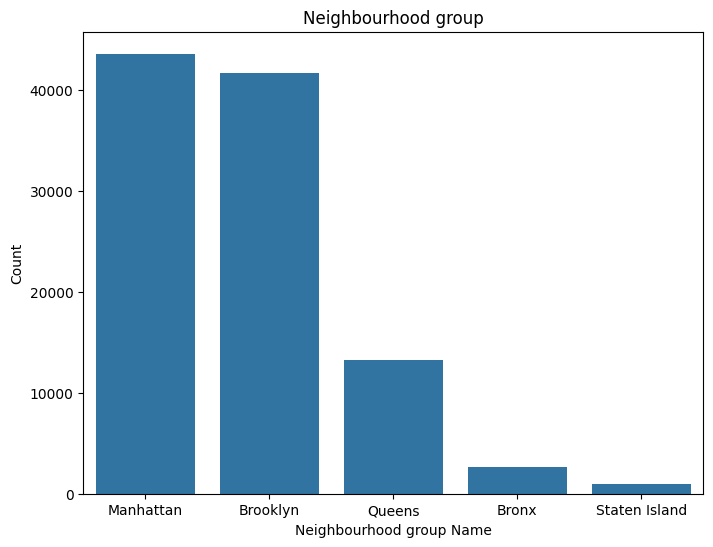


Average Price by Neighborhood Group:
neighbourhood_group
Bronx            626.773655
Brooklyn         625.594659
Manhattan        621.581488
Queens           629.115842
Staten Island    622.669125
Name: price, dtype: float64


In [32]:
# Neighborhood Characteristics

neighborhood_group_distribution = airbnb_df['neighbourhood_group'].value_counts()
print("Distribution of Listings by Neighborhood Group:")
print(neighborhood_group_distribution)

              
ng = airbnb_df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=ng.index, y=ng.values)
plt.title('Neighbourhood group')
plt.xlabel('Neighbourhood group Name')
plt.ylabel('Count')
plt.show() 

print("\nAverage Price by Neighborhood Group:")
average_price_by_neighborhood = airbnb_df.groupby('neighbourhood_group')['price'].mean()
print(average_price_by_neighborhood)

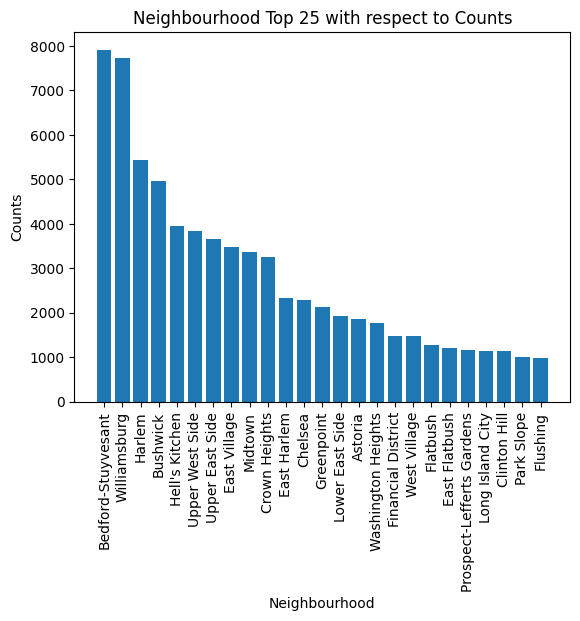

In [33]:
# Get the top 10 neighborhoods

neigh = airbnb_df['neighbourhood'].value_counts().head(25)
neigh

plt.bar(neigh.index, neigh.values)
plt.title('Neighbourhood Top 25 with respect to Counts')
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.xticks(neigh.index, rotation=90)
plt.show()

#### Cancellation Policy:

What are the common cancellation policies adopted by hosts?

Distribution of Cancellation Policies:
moderate    34238
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64


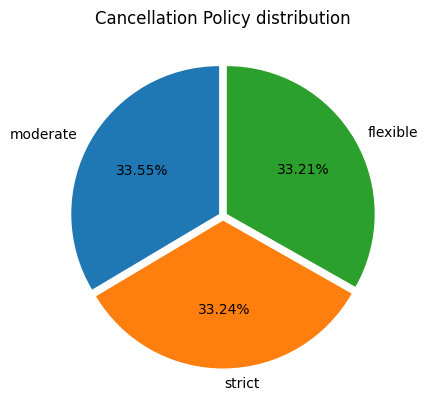

In [34]:
# Cancellation Policy
cancellation_policy_distribution = airbnb_df['cancellation_policy'].value_counts()
print("Distribution of Cancellation Policies:")
print(cancellation_policy_distribution)

canl_pol = airbnb_df['cancellation_policy'].value_counts()

plt.pie(canl_pol.values, labels=canl_pol.index, autopct='%1.2f%%', explode =[0.03,0.03,0.03],startangle=90)
plt.title('Cancellation Policy distribution')
plt.show()

#### Room Type and Pricing:

How does the distribution of room types vary in the dataset?
Is there a significant difference in pricing based on room types?

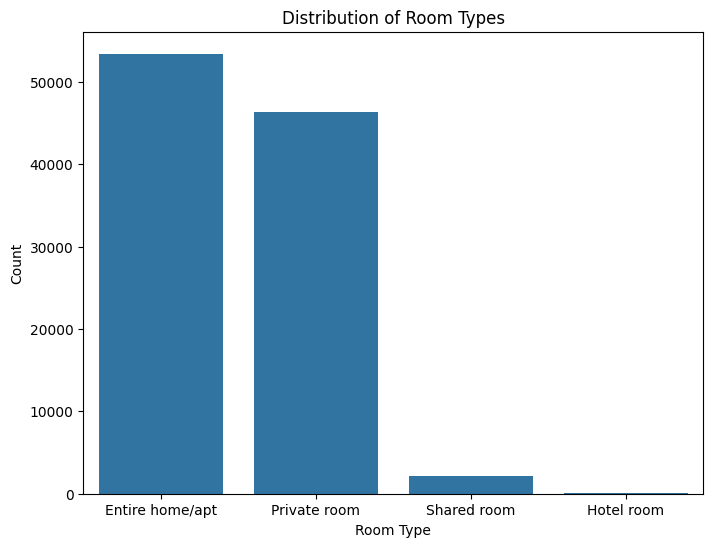

In [35]:
# Room Type Distribution and Pricing
room_type_distribution = airbnb_df['room_type'].value_counts()
plt.figure(figsize=(8, 6))

sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show() 

Average Price by Room Type:
room_type
Entire home/apt    624.196448
Hotel room         666.391304
Private room       623.976634
Shared room        633.274457
Name: price, dtype: float64


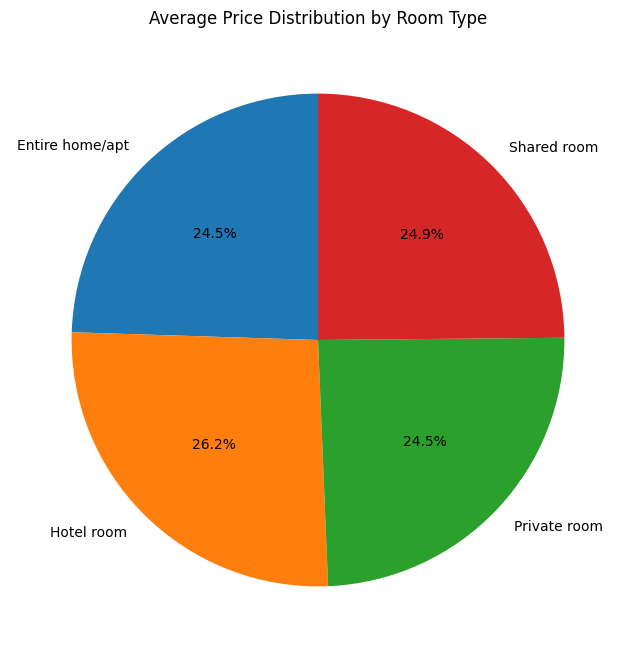

In [36]:
# Pricing Based on Room Types
room_type_price_comparison = airbnb_df.groupby('room_type')['price'].mean()
print("Average Price by Room Type:")
print(room_type_price_comparison)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_price_comparison, labels=room_type_price_comparison.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Price Distribution by Room Type')
plt.show()

#### Property Construction Year:

What is the distribution of the construction years of listed properties?

Distribution of Property Construction Years:
2014    5434
2008    5192
2006    5191
2019    5174
2009    5140
2020    5135
2010    5128
2022    5113
2003    5103
2012    5101
2005    5099
2007    5086
2015    5070
2017    5038
2011    5027
2018    5024
2004    5009
2021    5009
2013    4995
2016    4990
Name: construction_year, dtype: int64


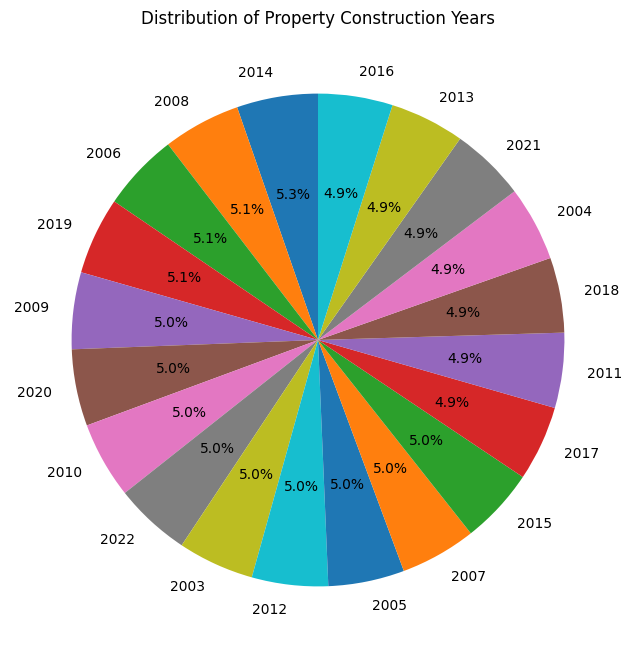

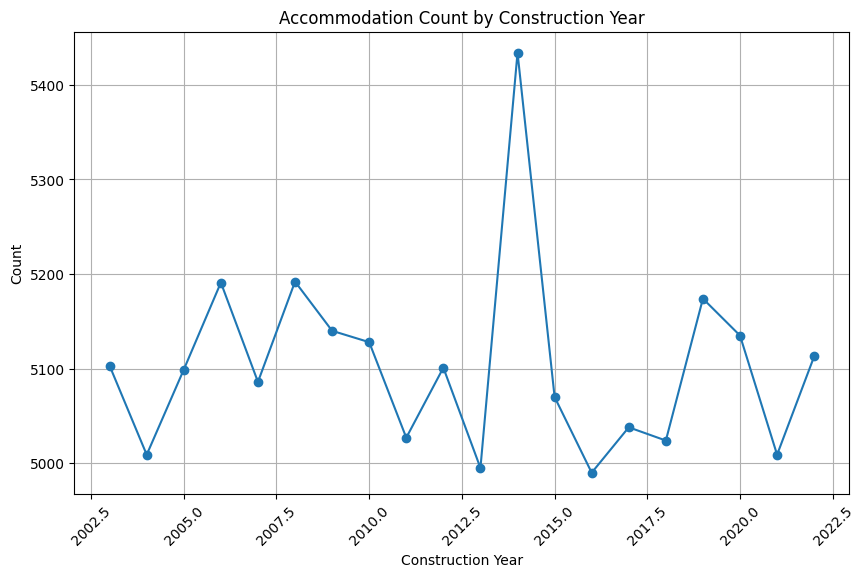

In [37]:
# Distribution of Property Construction Years
construction_year_distribution = airbnb_df['construction_year'].value_counts()
print("Distribution of Property Construction Years:")
print(construction_year_distribution)

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(construction_year_distribution, labels=construction_year_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Construction Years')
plt.show()

# Plotting a line chart
construction_year_count = airbnb_df.groupby('construction_year')['price'].count()
plt.figure(figsize=(10, 6))
construction_year_count.plot(kind='line', marker='o')
plt.title('Accommodation Count by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [38]:
# Count of "Type of rooms" Constructed in each Year.
room = airbnb_df.groupby('construction_year')['room_type'].value_counts()
roomDF = pd.DataFrame(room)
roomDF

room_type
construction_year room_type                 
2003              Entire home/apt       2745
                  Private room          2256
                  Shared room             98
                  Hotel room               4
2004              Entire home/apt       2639
...                                      ...
2021              Hotel room               8
2022              Entire home/apt       2725
                  Private room          2269
                  Shared room            113
                  Hotel room               6

[80 rows x 1 columns]

#### Pricing and Service Fee:

How is the pricing structured in relation to the service fee?

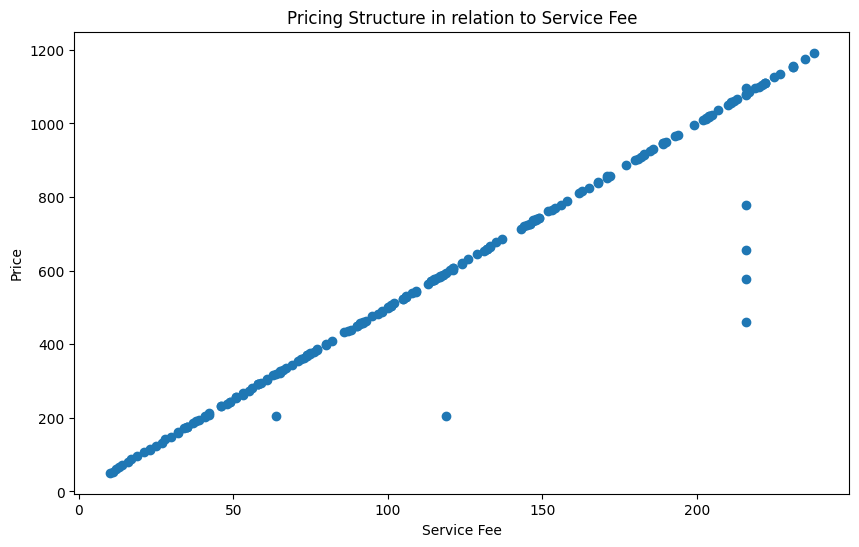

In [39]:
# Pricing Structure in relation to Service Fee.
plt.figure(figsize=(10, 6))

plt.scatter(x='service_fee', y='price', data=airbnb_df.head(200))
plt.title('Pricing Structure in relation to Service Fee')
plt.xlabel('Service Fee')
plt.ylabel('Price')
plt.show()

Brooklyn


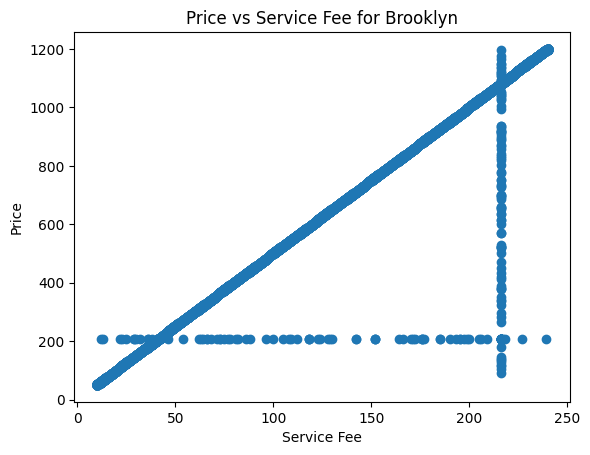

Manhattan


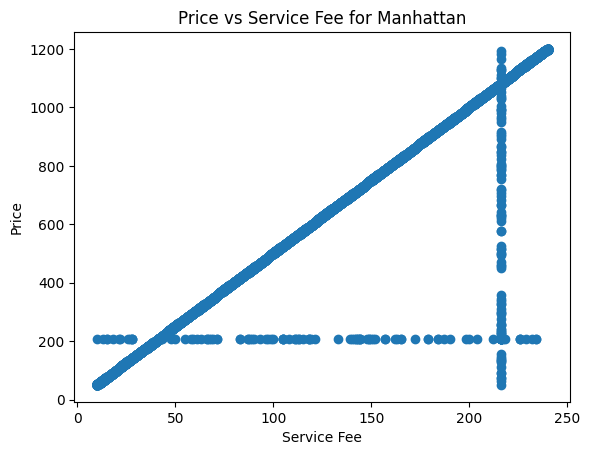

Queens


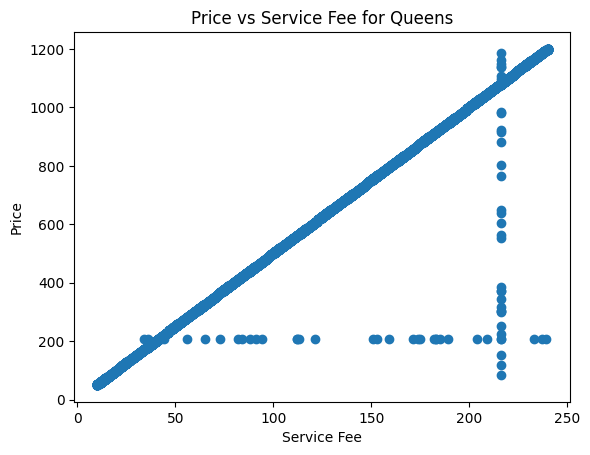

Staten Island


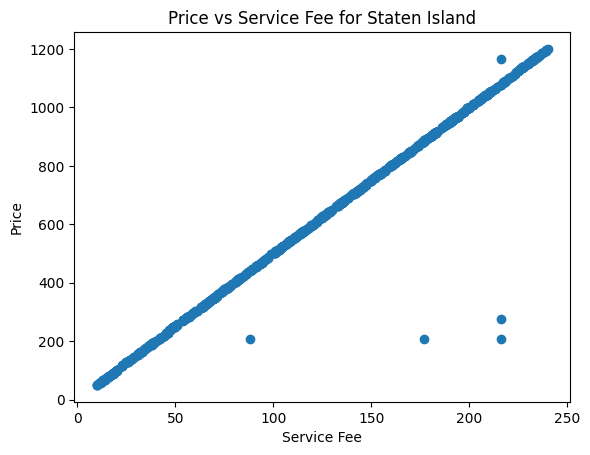

Bronx


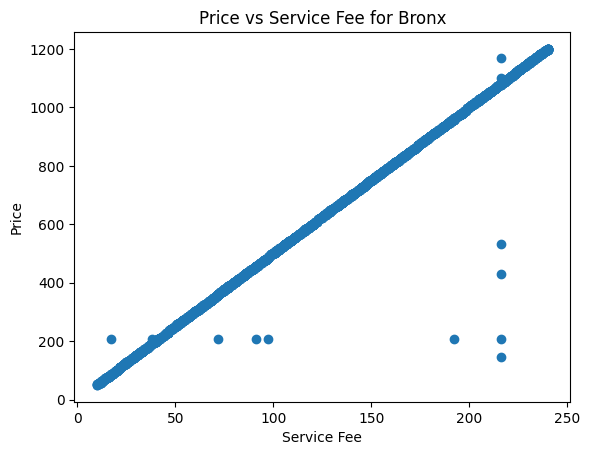

In [40]:
# Pricing Structure in relation to Service Fee in each neighbourhood_group.

neighbour = airbnb_df['neighbourhood_group'].unique()

for i in neighbour:
    neighbour_data = airbnb_df.loc[airbnb_df['neighbourhood_group'] == i, ['price', 'service_fee']]
    print(i)
    
    plt.figure()
    
    plt.scatter(neighbour_data['service_fee'],neighbour_data['price'])
    
    plt.title(f'Price vs Service Fee for {i}')
    plt.ylabel('Price')
    plt.xlabel('Service Fee')
    plt.show()

#### Minimum Nights and Availability:

What is the typical minimum nights requirement for bookings?
Is there any pattern between the minimum nights and listing availability?

In [41]:
# Typical Minimum Nights Requirement for Bookings

typical_min_nights = airbnb_df['minimum_nights'].median()
print(f"Typical Minimum Nights Requirement for Bookings: {typical_min_nights}")

Typical Minimum Nights Requirement for Bookings: 3.0


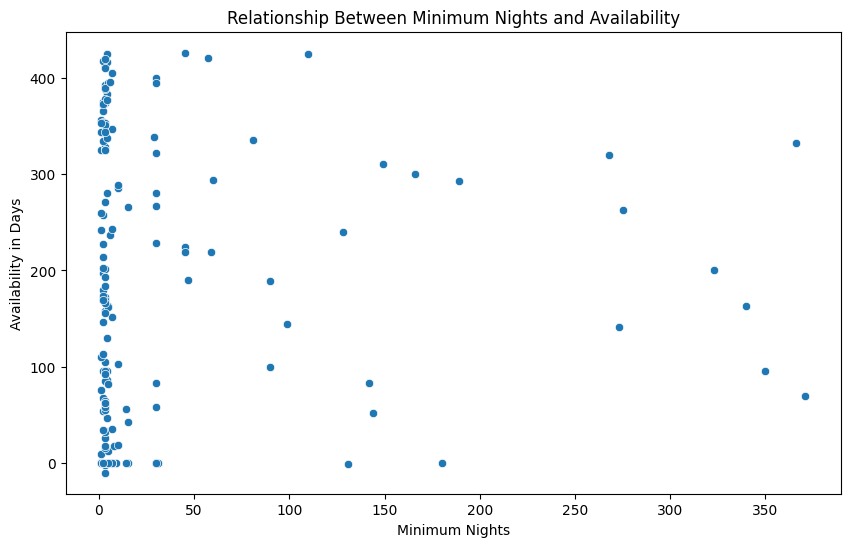

In [42]:
# Relationship Between Minimum Nights and Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='availability_365', data=airbnb_df.head(200))
plt.title('Relationship Between Minimum Nights and Availability')
plt.xlabel('Minimum Nights')
plt.ylabel('Availability in Days')
plt.show()